Replacement of the tails
==========================

Definitions
---------------

Let us consider a Green function G (or a self) or in 
general a function G(z) on the complex plane with a 
spectral representation 
$$ G(z) = \int d \epsilon \frac{\rho(\epsilon)}{z-\epsilon}$$

We assume (it is true in general) that $\rho$ has a compact support,
so in particular that there is a tail, i.e.
a series at $z=\infty$ with a finite radius of convergence $R_\infty$.

$$ G(z) \mathop{\sim}_{z \rightarrow \infty} \sum_{n\geq 0} \frac{a_n}{z^n}$$

and for $z > R_\infty$, when truncated at order $N$, 

$$ G(z) = \sum_{n= 0}^{N-1}\frac{a_n}{z^n} + O\left( \dfrac{R_\infty}{|z|} \right)^{N} $$

Unit circle
------------

Let us now consider a radius $R > R_\infty$, and the $N$-th roots of unity on that circle
i.e. the points

$$ \omega_k = R \exp(2i\pi k/N) \qquad \text { for } 0 \leq k < N$$

Since $R > R_\infty$, we have

$$ G(\omega_k) = \sum_{n= 0}^{N-1}  \frac{a_n}{\omega_k^n} + O\left( \dfrac{R_\infty}{R} \right)^{N} $$

If we choose $R_\infty/ R$ small enough, e.g. $1/2$ and $N$ large enough e.g. $10$, 
we have at precision $\epsilon \approx O\left( \dfrac{R_\infty}{R} \right)^{N} \approx 10^{-3}$

$$ G(\omega_k) = \sum_{n= 0}^{N-1}  \frac{a_n}{\omega_k^n} = \sum_{n= 0}^N  \frac{a_n}{R^{n}} e^{- \frac{2i\pi n k}{N}} $$

The $N$ points $ G_\omega \equiv \{G(\omega_k)\}_{k \in [0,N-1]} $ are the (discrete) Fourier transform (DFT)
of the $A_N \equiv \{ a_n R^{-n}\}_{n \in [0,N-1]}$.

By definition of the DFT, the matrix relating $G_\omega$ and $A_N$ is unitary.
So an error order $\epsilon$ on one translate into the same order of error on the other.

Moreover, for  any $|z| > R$ (outside the circle of radius $R$), 
we have 

$$ G(z) = \sum_{n= 0}^{N-1}\frac{a_n}{R^n} \frac{R^n}{z^n} + O(\epsilon) $$

and the error is controlled by the error on $a_n$, it is not amplified.

Replace tails
----------------

Instead of the tail ($A_N$) I can therefore chose the $G_\omega$ for a proper $R$.
The DFT relation shows that I can quickly move between the 2 representations.

One would like to store Green function points
for $i\omega_n < R$, and then store its values at $\omega_k$ points.

$R$ must be : 

* Larger than $R_\infty$ or the tail sum would not converge.

* Not too large, or the $A_N$ will decrease fast, and we can only use the tail 
  to compute reliably for $|z| > R$.
  
  
$N$ must be large enough so that $(R_\infty/R)^{N} < \epsilon$
where $\epsilon$ is the chosen precision.

The closer $R$ gets to $R_\infty$, the larger $N$ must be.

Note that at finite $N$, even if $G_\omega$ are exact, there is an error
of order $\epsilon$ on the $A_N$.

  
The (big) technical advantage is that we store the value of $G$ at some complex points
(but not Matsubara points).
Hence, we simply add $N$ points to our "mesh" and 

* A loop over all mesh points will also compute $G_\omega$, hence also the tails !
  It solves our API headaches.

* Any linear operation is equivalent to the same on the tail.

* A multiplication of Green function is just ... a multiplication
  (which indeed correspond to a *convolution* in the tail, cf formula for formal series multiplication).

* There is no need to store a tail separately, it is in the mesh.

* But we still automatically compute it e.g. in a self-consistency condition.

* After a QMC, we simply leave these points to 0 or 1/\omega

Drawbacks
------------

- Need to have non matsubara points at the end of the mesh, 
  so we have to skip them in plotting, Fourier, density ...
  But it is easy to do.
  
- For real frequencies, we have to make them complex now ...
  but that is a small price.
  
Tail fitting
--------------

- We adjust the $G_\omega$ so that the computation of $G(z)$ fits 
  the function for $|i\omega_n| < R$.
  

A little numerical test
============================

- I do the calculation to play with $N$ and $R$
  for a simple fraction.






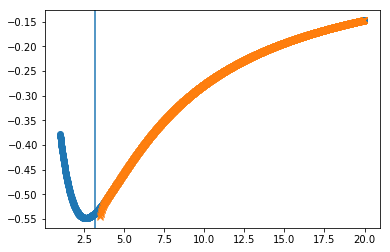

In [118]:
import numpy as np
from cmath import exp, pi

def f(w) : return 1/(w+2.0) + 2/(w + 3.2)

N = 30
R = 10.0

#print "Estimated error", (3.2/R)**N

roots = np.array([ R * exp(2j * pi /N * k) for k in range (N)])
G = f(roots)

# inverse Fourier Transform
A = np.fft.ifft(G)
#print A.real[:]
#print np.array([x.real*R**(n) for n,x in enumerate (A)])

# Comparing 
def f2(w):
    return sum( A[i] * (R/w)**i if abs(A[i]) > 1.e-15 else 0 for i in range (N))

#for w in np.arange(3, 20, 0.1):
#    print w, abs(f2(w)/f(w) -1), abs(f2(w) - f(w))#,  f2(w).real, f(w)

plt.plot(np.arange(1,20,.01), [f(w*1j).imag for w in np.arange(1,20,.01)], '-o')
plt.plot(np.arange(3.5,20,.01), [f2(w*1j).imag for w in np.arange(3.5,20,.01)],'x')
plt.axvline(x=3.2)

1 3.0 3.00000000013 -4.22151202883e-11
2 -8.4 -8.40000000041 -4.82458517581e-11
3 24.48 24.4800000013 -5.29775112668e-11
4 -73.536 -73.5360000041 -5.6432747364e-11
5 225.7152 225.715200013 -5.88407100821e-11
6 -703.08864 -703.088640042 -6.04396532822e-11
7 2211.483648 2211.48364814 -6.15140161031e-11
8 -6999.9476736 -6999.94767404 -6.21795948064e-11
9 22246.2325555 22246.2325569 -6.26975138474e-11


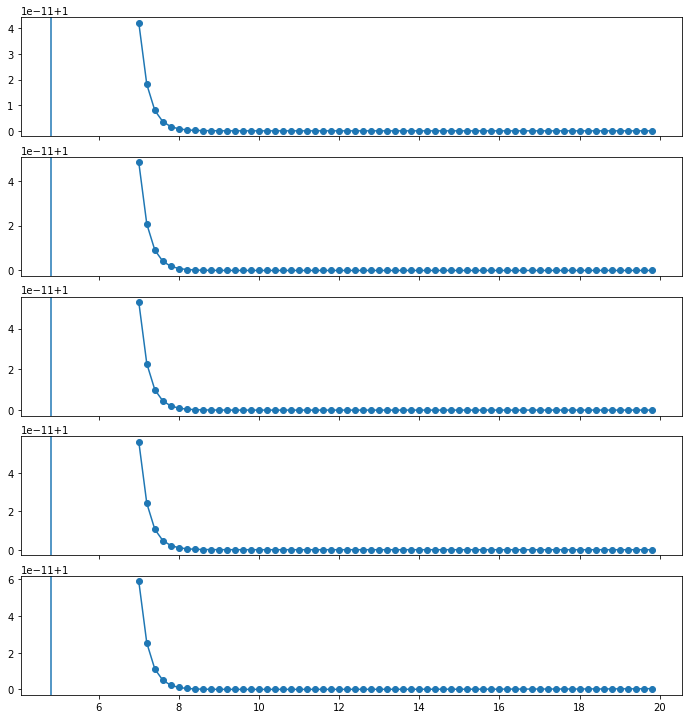

In [108]:
import numpy as np
from cmath import exp, pi
from matplotlib import pyplot as plt
%matplotlib inline

N = 30
def f(w) : return 1/(w+2.0) + 2/(w + 3.2)
def analytic_coef(n):
    if n <=0 : return 0
    n = n-1
    return (-3.2)**n*2 + (-2)**n

np.set_printoptions(suppress=True, precision=15)

def calc(R, N):
    roots = np.array([ R * exp(2j * pi /N * k) for k in range (N)])
    G = f(roots)
    # inverse Fourier Transform
    A = np.fft.ifft(G)
    return np.array([x.real*R**(n) for n,x in enumerate (A)])

RR = np.arange(7,20,0.2)
Rs = np.vstack( [calc(R, N) for R in RR])

fig, axarr = plt.subplots(5, sharex=True, figsize=(10,10))
fig.tight_layout()
for No in range(1,6):
    #print "analytic", analytic_coef(No)/ np.polyfit([1.0/r for r in RR], Rs[:,No], 5)[-1]
    axarr[No-1].plot([1.0*r for r in RR], Rs[:,No]/analytic_coef(No), '-o')
    #axarr[No-1].plot([1.0*r for r in RR], Rs[:,No], '-o')
    axarr[No-1].axvline(x=1.5*3.2)

C = calc(7,N)
for i in range(1, 10):
    print i, analytic_coef(i), C[i], analytic_coef(i)/ C[i] -1

#[calc(2, n)[2] for n in range(10,45,1)]    

In [160]:
# Unused, just for example
#from sympy import Symbol, cos, series,oo, Poly
#x = Symbol('x')
#print series(x/(1+2.0*x), n = 10)

In [124]:
def gcd(a,b):
    """Compute the greatest common divisor of a and b"""
    while b > 0:
        a, b = b, a % b
    return a
    
def lcm(a, b):
    """Compute the lowest common multiple of a and b"""
    return a * b / gcd(a, b)

def lcml(a,*l):
    if len(l)==1 : return lcm(a,*l)
    return lcm( a, lcml(*l))

lcml(10,12,15,20,30), lcml(20,12,30)

(60, 60)